# HTTP Requests

Author: Mike Wood

In this lesson, we will explore how to obtain data from webpages on the internet using Python. By the end of this notebook, you should be able to:
1. Read data from a simple text web page
2. Parse data from a web page with html formatting
3. Download images from a web page using the image url
4. Download data from a website using the download link's url

**Import the modules required for this notebook**

In [1]:
# import the requests, BeautifulSoup, and shutil modules
import requests
from bs4 import BeautifulSoup
import shutil

**Reading data from Websites**

The foundation for data communication on the internet is Hypertext Transfer Protocol, or HTTP for short. Information on any webpage or on any publicly link can be "requested" using the HTTP protocol. In this notebook, we'll explore various ways to make these requests using Python. Many websites provide a additional means to access data from their databases in the form of an Application Programmng Interface (API). Many online services such as Google, OpenAI, etc. provide APIs and we will explore these tools in the next notebook. 

**A Note on Web Scraping**

Gathering data from public websites using HTTP requests is also known as "web scraping". The term is most commonly used when data is gathered from a large quantity of different pages. In the U.S., it is perfectly legal to write programs to gather data from web pages as long as you don't use information to harm the company and/or its website. There are a few guidelines to follow regarding web scraping:
1. Don't overwhelm sites by making excessive requests
2. Give attribution to the sites where you retrieve your data
3. Only gather data from sites that are publicly available.

In general, if you following the above guidelines and are gathering data from public websites for educational purposes (rather than writing code to support a business interest), then you are in the clear. 

**Example for this notebook: National Data Buoy Center data**

To get familiar with web scraping, we are going to download data from various components of NOAA's [National Data Buoy Center website](https://www.ndbc.noaa.gov/). This website hosts oceanographic and meteorological data collected by NOAA (and paid for by U.S. tax payers) is freely available for the public to access and use.



## Reading simple text data
To explore handling data from the web, first we will start with simple text data. One easy set of data to visualize is the data from the National Buoy Data Center. Take a look at an example web page by following the link: https://www.ndbc.noaa.gov/data/realtime2/46092.txt

We can access this data using Python using the requests module: 

In [2]:
# define a url to the web page
url = 'https://www.ndbc.noaa.gov/data/realtime2/46092.txt'

# use the requests package to read the page to a response
response = requests.get(url)

# print the response status code
print('Status Code:',response.status_code)

# print the response status description (reason)
print('Status Code Description:',response.reason)

# save the page text into a string
page_text = response.text

# split the text by next lines and print the first 3 lines
page_text = page_text.split('\n')
print(page_text[:3])

Status Code: 200
Status Code Description: OK
['#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS PTDY  TIDE', '#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC  nmi  hPa    ft', '2025 04 01 02 59 110  9.0   MM    MM    MM    MM  MM 1017.0  11.2  12.2    MM   MM   MM    MM']


### &#x1F914; Mini-Exercise
Goal: The National Weather Service produces regional text-based forecasts for weather that can be transmitted to boats operating in US Coastal Waters. Read in data from the most recent forecast to find out about current weather alerts. The alerts for San Francisoc Bay area can be accessed at https://tgftp.nws.noaa.gov/data/raw/fz/fzus56.kmtr.cwf.mtr.txt.

#### &#x1F4A1; Solution

In [3]:
# enter your code here
# define a url to the web page
url = 'https://tgftp.nws.noaa.gov/data/raw/fz/fzus56.kmtr.cwf.mtr.txt'

# use the requests package to read the page
response = requests.get(url)

# save the page text into a string
page_text = response.text

# split the page_text at new line characters
page_text = page_text.split('\n')

# join lines 17-24 with a space to generate the message
message = ' '.join(page_text[17:24])
print(message)

 Some isolated showers continue over waters. Strong gusty westerly winds will continue into Wednesday. A large W-NW swell will build on Tuesday as the strong breeze shifts from W to NW.  Significant wave heights will peak at around 15 feet Tuesday  before subsiding Wednesday. 


## Parsing data from HTML-formatted pages
Typically, web pages are not just text - they are formatted with HyperText Markup Language (HTML) formatting. Just like regular pages, we can read in HTML-formatted pages a typical ascii-style text:

In [4]:
# define the url to the station
url = 'https://www.ndbc.noaa.gov/station_page.php?station=46092'

# use the response module to get the data from the url
response = requests.get(url)

# read in the page text 
page_text = response.text
# print(page_text)

# split the text by lines
page_text = page_text.split('\n')

# search the lines for the one that has the "Water depth" information
for line in page_text:
    if 'Water depth' in line:
        print(line)

		<b>Water depth:</b> 1000 m<br>


As you can see above, it can be a little cumbersome to search through all of the html code to find what you might be looking for on a website. To obtain data from these sites in a usable format, it is helpful to leverage tools that can help to parse html code. Since HTML is a common language for web pages, there are several packages to organize and search HTML-scripted pages. One commonly-used function is Beautiful Soup:

In [5]:
# use BeautifulSoup to parse the html data
soup = BeautifulSoup(response.content, "html.parser")

# search for the division with the id "stn_metadata"
# store it as a variable called stn_metadata
stn_metadata = soup.find("div", {"id": "stn_metadata"})

# convert the stn_metadata to a string
stn_metadata = str(stn_metadata)

# split the stn_metadata
stn_metadata = stn_metadata.split('\n')

# search for the "Water depth" in the stn_metadata
for line in stn_metadata:
    if 'Water depth' in line:
        print(line)

<b>Water depth:</b> 1000 m<br/>


### &#x1F914; Mini-Exercise
Goal: Find the link to the NDBC's Facebook site.

The [front page](https://www.ndbc.noaa.gov/) of the NDBC site contains three links to the Facebook, LinkedIn, and Twitter (X) pages for the NDBC social media. These are contained in an html division with the class "socialMediaContainer". Use the requests library to open the page and the BeautifulSoup module to parse the html text. Then, find the division with the social media information to find where the link to the Facebook page leads. In particular, print the line with the "NDBC on Facebook" string.

#### &#x1F4A1; Solution

In [6]:
# define the url to the station
url = 'https://www.ndbc.noaa.gov'

# use the response module to get the data from the url
response = requests.get(url)

# use BeautifulSoup to parse the html data
soup = BeautifulSoup(response.content, "html.parser")

# search for the division with the id "footer_column"
# store it as a variable called footer_column
footer_column = soup.find("div",{"class": "socialMediaContainer"})

# convert the footer_column to a string and split it
footer_column = str(footer_column)
footer_column = footer_column.split('\n')

# search for the "NDBC on Facebook" in the stn_metadata
for line in footer_column:
    if 'NDBC on Facebook' in line:
        print(line)

<a class="socialMediaLink" href="/ndbcexit.php?url=https://www.facebook.com/NWSNDBC&amp;blurb=NDBC%20on%20Facebook"><img alt="Facebook Logo" class="socialMediaLogo" height="21" src="/images/facebook_logo.png" title="NDBC on Facebook" width="21"/> NDBC on Facebook</a>


## Obtaining images from web pages
Anything that exists on a web page can be obtained and stored on your local system. For example, images that are hosted on web pages can be stored on your system. Consider again the Monterey Buoy 46092 as described here: https://www.ndbc.noaa.gov/station_page.php?station=46092

This page contains an image file for the buoy. Let's find the link to the buoy and download it!

In [7]:
# provide a path to the buoy image
image_file = 'https://www.ndbc.noaa.gov/images/stations/46092.jpg'

# use the requests module to get the image
r = requests.get(image_file)

# define an output name for the image
output_file = 'buoy_image.jpg'

# open the file as a writable binary
with open(output_file, 'wb') as f:
    # iterate through the chunks and write to the file
    for chunk in r:
        f.write(chunk)

### &#x1F914; Mini-Exercise
Goal: Find and store an image from your favorite web site. 

Any publically-available image on the web can be downloaded with the requests module. Download your favorite image in the block below and store it to your system. If you don't have a favorite site or image, you can download this comic: https://imgs.xkcd.com/comics/git_2x.png

#### &#x1F4A1; Solution

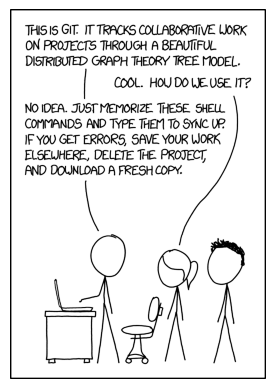

In [8]:
# define the output_file is 
output_file = 'git_image.jpg'

# download an image into the file path above
# enter your code here
image_file = 'https://imgs.xkcd.com/comics/git_2x.png'

# use the requests module to get the image
r = requests.get(image_file)

# write the image to the file
with open(output_file, 'wb') as f:
    for chunk in r:
        f.write(chunk)

# show the image using the code from Homework 4:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure()
img = mpimg.imread(output_file)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
plt.close(fig)

## Downloading data from links
A lot of data is provided online with through accessible links to data from remote data servers. For example, the historical buoy data on the NDBC site is stored in compressed format. We can have a look at the available historical data for the Monterey Buoy here: https://www.ndbc.noaa.gov/station_history.php?station=46092

Below, let's download the compressed 2022 data stored in the `46092h2022.txt.gz` file.

In [9]:
# enter the url here
url = 'https://www.ndbc.noaa.gov/data/historical/stdmet/46092h2022.txt.gz'

# use the requests module to get the data
r = requests.get(url)

# define an output file 
output_file = '46092h2022.txt.gz'

# read the file in as chunks
with open(output_file, 'wb') as f:
    for chunk in r:
        f.write(chunk)